b0:be:83:32:21:c0


/opt/anaconda3/lib/python3.9/site-packages/xarray/conventions.py:516: SerializationWarning: variable 'air' has multiple fill values {-99, 32767}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/opt/anaconda3/lib/python3.9/site-packages/xarray/conventions.py:516: SerializationWarning: variable 'air' has multiple fill values {-99, 32767}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


ValueError: setting an array element with a sequence.

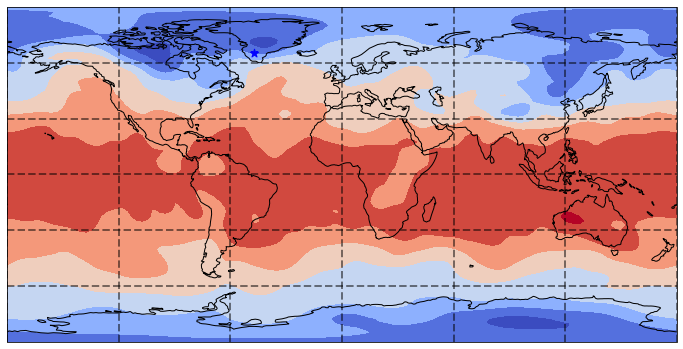

In [20]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point

from getmac import get_mac_address as gma
mac = gma()
print(mac)
ds = xr.open_dataset(r'/Users/robinhsieh/programming/py37/air.sfc.1981.nc')
ds2 = xr.open_dataset(r'/Users/robinhsieh/programming/py37/air.1991.nc')
ds3 = xr.open_dataset(r'/Users/robinhsieh/programming/py37/air.2001.nc')
ds4 = xr.open_dataset(r'/Users/robinhsieh/programming/py37/air.2011.nc')
ds5 = xr.open_dataset(r'/Users/robinhsieh/programming/py37/air.sfc.2021.nc')

lats = ds.variables['lat'][:]
lons = ds.variables['lon'][:]
#print (lons)
time = ds.variables['time'][:]
temp = ds.variables['air'][:]
temp2 = ds2.variables['air'][:]
temp3 = ds3.variables['air'][:]
temp4 = ds4.variables['air'][:]
temp5 = ds5.variables['air'][:]

temp, lons = add_cyclic_point(temp, coord=ds['lon'])

fig = plt.figure(figsize=(12,9))

ax = plt.axes(projection=ccrs.PlateCarree())

cs = ax.contourf(lons, lats, temp[0, :, :], 
                 transform = ccrs.PlateCarree(), cmap = 'coolwarm', extend  = 'both')

# Add coastlines;
ax.coastlines()

# Add gridlines;
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False,
                 linewidth=2, color='black', alpha=0.5, linestyle='--')

gl.xlines = True
gl.ylines = True

ix = int(-51.73/2.5)
jy = int((90.-64.17)/2.5)
ax.scatter(lons[ix], lats[jy], marker="*", color='b', s=75, transform=ccrs.PlateCarree())

temp1d=np.zeros(365)
temp2d=np.zeros(365)
temp3d=np.zeros(365)
temp4d=np.zeros(365)
temp5d=np.zeros(365)
x1d=np.zeros(365)
for i in range(365):
    x1d[i]=i
    temp1d[i]=temp[i, jy, ix] # extract 1981 data;
    temp2d[i]=temp2[i, jy, ix]
    temp3d[i]=temp3[i, jy, ix]
    temp4d[i]=temp4[i, jy, ix]
    temp5d[i]=temp5[i, jy, ix]

# Define the xticks for Longitudes;
ax.set_xticks(np.arange(-180, 181, 60), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for Latitudes;

ax.set_yticks(np.arange(-90, 91, 30), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)

# Add color bar;
cbar = plt.colorbar(cs, shrink=0.9, orientation='horizontal', label = 'Surface Air Temperature (K)')

# Add figure title;
plt.title('Global Surface Temperature 1981 from NCEP 109601005\n'+mac)
fig.savefig('fex_5_1.png', dpi=300)

plt.show()

NameError: name 'temp2d' is not defined

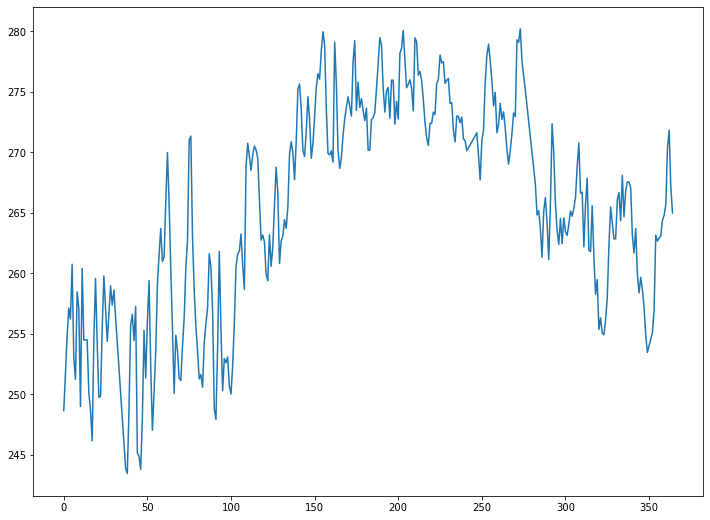

In [19]:
fig = plt.figure(figsize=(12, 9))
plt.plot(x1d, temp1d, label='1981')
plt.plot(x1d, temp2d, label='1981')
plt.plot(x1d, temp3d, label='1981')
plt.plot(x1d, temp4d, label='1981')
plt.plot(x1d, temp5d, label='1981')
plt.xlabel('Time (Day)')
plt.ylabel('Temperature ($^o$K)')
plt.title('Taiwan Surface Temperature from NCEP 1981\n109601005'+mac)
plt.legend(loc='best', fontsize=12)
ax = plt.gca()
ax.grid(which='major', axis='both', linestyle='-')
fig.savefig('fex_5_2.png', dpi=300)